In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Text(0.5, 1.0, 'Top 5 Skills for Data Scientists Per Month')

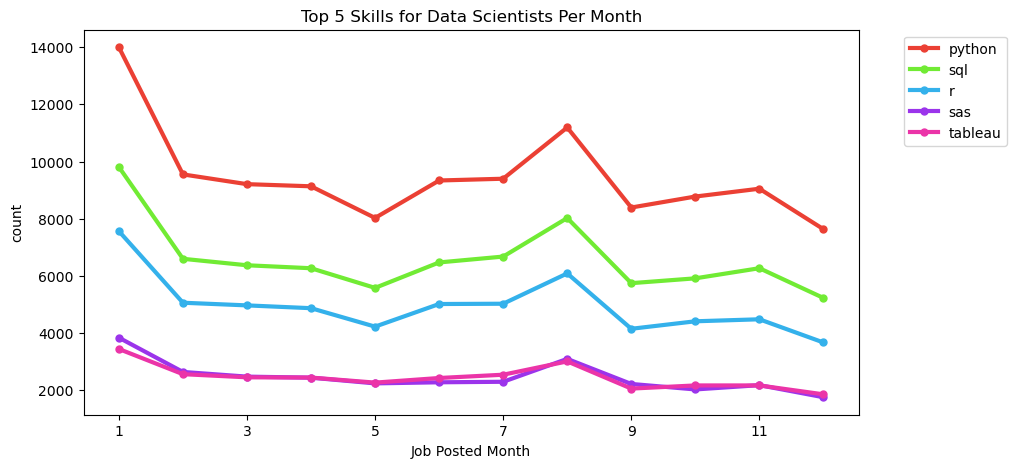

In [17]:
datajob = df[df["job_title_short"] == "Data Scientist"].copy()
datajob["job_posted_month"] = datajob["job_posted_date"].dt.month
database_DA2 = datajob.explode("job_skills")

pivot = database_DA2.pivot_table(index = 'job_posted_month', columns = "job_skills", aggfunc = "size", fill_value = 0)

pivot.loc["Total"] = pivot.sum()


pivot.loc["Total"] = pivot.sum(numeric_only=True)
sorted_cols = pivot.loc["Total"].sort_values(ascending=False).index
pivot = pivot[sorted_cols]

pivot = pivot.drop("Total")

pivot

colors = ["#eb4034", "#71eb34", "#34b1eb","#9b34eb" , "#eb34a8"]
pivot.iloc[:, :5].plot(
    kind="line",
    linewidth = 3,
    linestyle = "-", 
    color = colors, 
    marker = "o", 
    markersize = 5, 
    figsize = (10,5)


    
    
    )

plt.ylabel("count")
plt.xlabel("Job Posted Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Top 5 Skills for Data Scientists Per Month")


